In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
! cp "drive/My Drive/Colab Notebooks/data/a5.zip" data
! unzip -q data/a5.zip data/a5

In [0]:
from google.colab import drive
drive.mount('/content/drive')

#### Задание 1. Загрузите данные. Разделите исходный набор данных на обучающую, валидационную и контрольную выборки.

In [0]:
base_dir = '/content/data/a5'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir, train_dogs_dir = (os.path.join(train_dir, 'cats'), os.path.join(train_dir, 'dogs'))
val_cats_dir, val_dogs_dir = (os.path.join(val_dir, 'cats'), os.path.join(val_dir, 'dogs'))
test_cats_dir, test_dogs_dir = (os.path.join(test_dir, 'cats'), os.path.join(test_dir, 'dogs'))

num_cats_train, num_dogs_train = (len(os.listdir(train_cats_dir)), len(os.listdir(train_dogs_dir)))
num_cats_val, num_dogs_val = (len(os.listdir(val_cats_dir)), len(os.listdir(val_dogs_dir)))
num_cats_test, num_dogs_test = (len(os.listdir(test_cats_dir)), len(os.listdir(test_dogs_dir)))

total_train = num_cats_train + num_dogs_train
total_val = num_cats_val + num_dogs_val
total_test = num_cats_test + num_dogs_test

print('Cat images (train, val, test):', num_cats_train, num_cats_val, num_cats_test)
print('Dog images (train, val, test):', num_dogs_train, num_dogs_val, num_dogs_test)

print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_test)

Cat images (train, val, test): 10500 1000 1000
Dog images (train, val, test): 10500 1000 1000
--
Total training images: 21000
Total validation images: 2000
Total test images: 2000


#### Задание 2. Реализуйте глубокую нейронную сеть с как минимум тремя сверточными слоями. Какое качество классификации получено?

In [0]:
BATCH_SIZE = 100
IMG_SHAPE  = 150

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(256,(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 32, 32, 128)     

In [0]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)
image_gen_train = ImageDataGenerator(rescale=1./255)
image_gen_test = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                 directory=validation_dir, 
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir, 
                                                     shuffle=True, 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=test_dir, 
                                                     shuffle=True, 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 21000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_data_gen,
                   steps_per_epoch=150,
                   epochs=10,
                   validation_data=val_data_gen,
                   validation_steps=50,
                   verbose=1)

Epoch 1/10
150/150 [==============================] - 67s 448ms/step - loss: 0.6750 - acc: 0.5689 - val_loss: 0.6325 - val_acc: 0.6438
Epoch 2/10
150/150 [==============================] - 65s 430ms/step - loss: 0.6208 - acc: 0.6486 - val_loss: 0.5937 - val_acc: 0.6740
Epoch 3/10
150/150 [==============================] - 64s 428ms/step - loss: 0.5808 - acc: 0.6937 - val_loss: 0.5358 - val_acc: 0.7272
Epoch 4/10
150/150 [==============================] - 64s 429ms/step - loss: 0.5432 - acc: 0.7235 - val_loss: 0.5342 - val_acc: 0.7386
Epoch 5/10
150/150 [==============================] - 64s 424ms/step - loss: 0.5212 - acc: 0.7441 - val_loss: 0.4737 - val_acc: 0.7782
Epoch 6/10
150/150 [==============================] - 64s 426ms/step - loss: 0.4748 - acc: 0.7767 - val_loss: 0.4767 - val_acc: 0.7650
Epoch 7/10
150/150 [==============================] - 64s 429ms/step - loss: 0.4621 - acc: 0.7786 - val_loss: 0.4689 - val_acc: 0.7782
Epoch 8/10
150/150 [==============================] - 6

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Flipping the image horizontally

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 21000 images belonging to 2 classes.


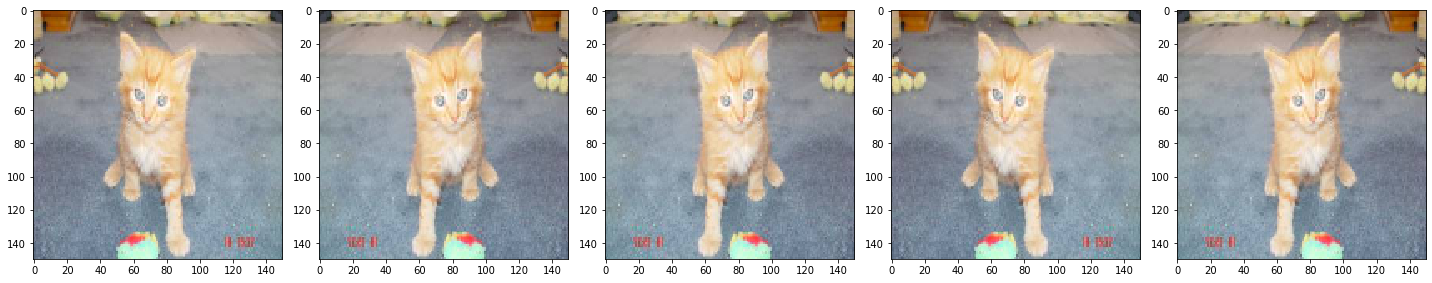

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Rotating the image

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 21000 images belonging to 2 classes.


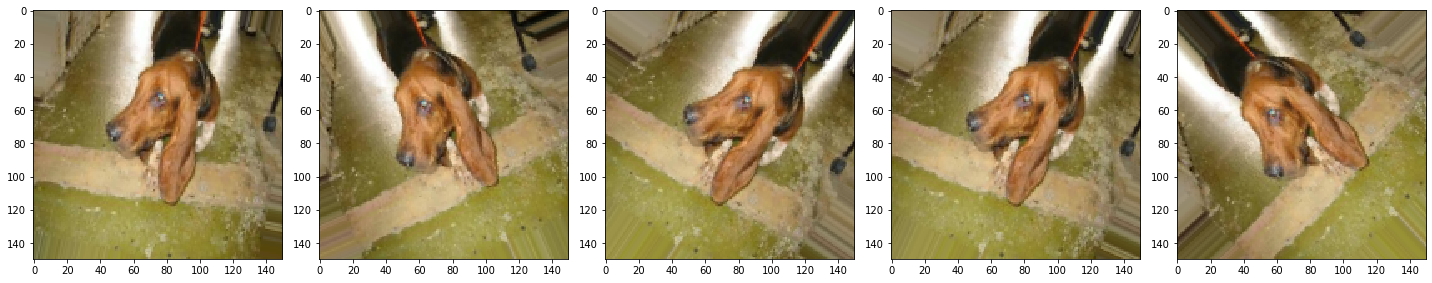

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Applying Zoom

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 21000 images belonging to 2 classes.


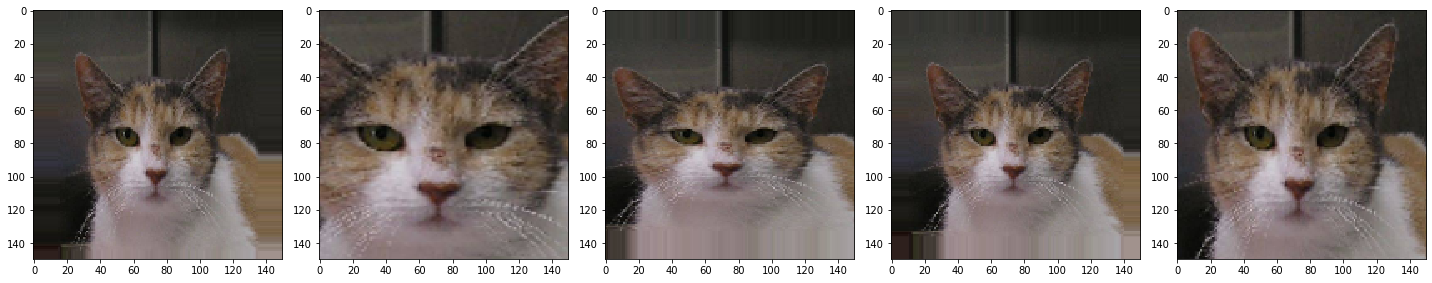

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Putting it all together

In [0]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir, 
                                                     shuffle=True, 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 21000 images belonging to 2 classes.


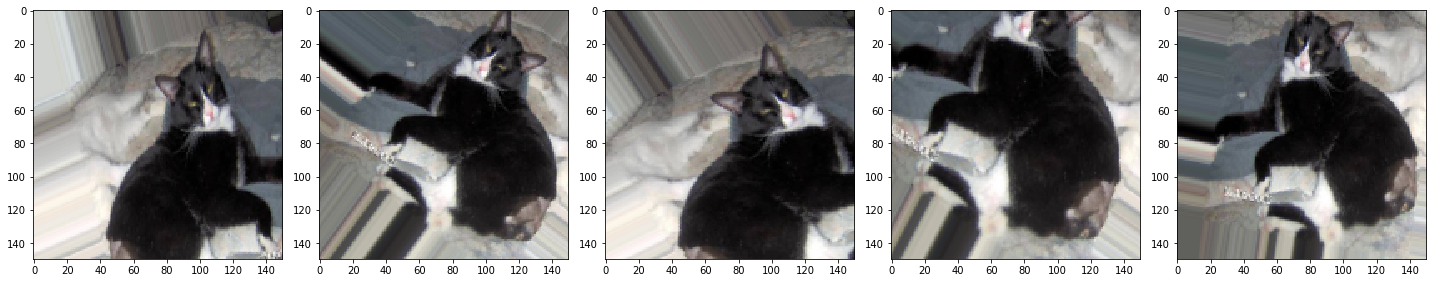

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Creating Validation Data generator

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                 directory=validation_dir, 
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

### Compiling the model

As usual, we will use the `adam` optimizer. Since we are output a softmax categorization, we'll use `sparse_categorical_crossentropy` as the loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so we are passing in the metrics argument.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Model Summary

Let's look at all the layers of our network using **summary** method.

### Train the model

It's time we train our network. 

Since our batches are coming from a generator (`ImageDataGenerator`), we'll use `fit_generator` instead of `fit`.

In [0]:
history = model.fit_generator(train_data_gen,
                   steps_per_epoch=10,
                   epochs=50,
                   validation_data=val_data_gen,
                   validation_steps=10,
                   verbose=1)

Epoch 1/50
10/10 [==============================] - 12s 1s/step - loss: 0.4095 - acc: 0.8120 - val_loss: 0.4220 - val_acc: 0.8060
Epoch 2/50
10/10 [==============================] - 10s 953ms/step - loss: 0.4473 - acc: 0.7940 - val_loss: 0.3643 - val_acc: 0.8220
Epoch 3/50
10/10 [==============================] - 10s 974ms/step - loss: 0.4487 - acc: 0.7960 - val_loss: 0.3941 - val_acc: 0.8340
Epoch 4/50
10/10 [==============================] - 9s 943ms/step - loss: 0.4240 - acc: 0.7890 - val_loss: 0.3792 - val_acc: 0.8380
Epoch 5/50
10/10 [==============================] - 9s 934ms/step - loss: 0.4348 - acc: 0.8040 - val_loss: 0.3661 - val_acc: 0.8370
Epoch 6/50
10/10 [==============================] - 10s 991ms/step - loss: 0.4249 - acc: 0.7920 - val_loss: 0.3530 - val_acc: 0.8400
Epoch 7/50
10/10 [==============================] - 10s 955ms/step - loss: 0.3611 - acc: 0.8430 - val_loss: 0.3443 - val_acc: 0.8590
Epoch 8/50
10/10 [==============================] - 10s 954ms/step - loss:

#### Задание 4. Поэкспериментируйте с готовыми нейронными сетями (например, AlexNet, VGG16, Inception и т.п.), применив передаточное обучение. Как это повлияло на качество классификатора? Какой максимальный результат удалось получить на сайте Kaggle? Почему?

In [0]:
inception_base = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False)

x = inception_base.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(120, activation='softmax')(x)

inception_model=tf.keras.Model(inputs=inception_base.input, outputs=preds)

In [0]:
for i,layer in enumerate(inception_model.layers):
  print(i,layer.name)

0 input_6
1 conv2d_560
2 batch_normalization_470
3 activation_470
4 conv2d_561
5 batch_normalization_471
6 activation_471
7 conv2d_562
8 batch_normalization_472
9 activation_472
10 max_pooling2d_73
11 conv2d_563
12 batch_normalization_473
13 activation_473
14 conv2d_564
15 batch_normalization_474
16 activation_474
17 max_pooling2d_74
18 conv2d_568
19 batch_normalization_478
20 activation_478
21 conv2d_566
22 conv2d_569
23 batch_normalization_476
24 batch_normalization_479
25 activation_476
26 activation_479
27 average_pooling2d_45
28 conv2d_565
29 conv2d_567
30 conv2d_570
31 conv2d_571
32 batch_normalization_475
33 batch_normalization_477
34 batch_normalization_480
35 batch_normalization_481
36 activation_475
37 activation_477
38 activation_480
39 activation_481
40 mixed0
41 conv2d_575
42 batch_normalization_485
43 activation_485
44 conv2d_573
45 conv2d_576
46 batch_normalization_483
47 batch_normalization_486
48 activation_483
49 activation_486
50 average_pooling2d_46
51 conv2d_572
52

In [0]:
for layer in inception_model.layers:
    layer.trainable=False

for layer in inception_model.layers[50:]:
    layer.trainable=True

In [0]:
inception_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = inception_model.fit_generator(train_data_gen,
                   steps_per_epoch=50,
                   epochs=20,
                   validation_data=val_data_gen,
                   validation_steps=10,
                   verbose=1)

Epoch 1/20
50/50 [==============================] - 47s 934ms/step - loss: 0.5480 - acc: 0.7250 - val_loss: 866.4164 - val_acc: 0.5000
Epoch 2/20
50/50 [==============================] - 43s 853ms/step - loss: 0.3547 - acc: 0.8460 - val_loss: 2.7745 - val_acc: 0.7230
Epoch 3/20
50/50 [==============================] - 42s 845ms/step - loss: 0.2847 - acc: 0.8792 - val_loss: 0.4588 - val_acc: 0.8620
Epoch 4/20
50/50 [==============================] - 42s 848ms/step - loss: 0.2590 - acc: 0.8892 - val_loss: 0.9747 - val_acc: 0.8600
Epoch 5/20
50/50 [==============================] - 42s 848ms/step - loss: 0.2362 - acc: 0.9018 - val_loss: 0.4023 - val_acc: 0.8790
Epoch 6/20
50/50 [==============================] - 42s 846ms/step - loss: 0.2194 - acc: 0.9062 - val_loss: 1.2639 - val_acc: 0.6250
Epoch 7/20
50/50 [==============================] - 42s 844ms/step - loss: 0.1971 - acc: 0.9208 - val_loss: 0.3312 - val_acc: 0.8670
Epoch 8/20
50/50 [==============================] - 42s 846ms/step 

In [0]:
score, acc = inception_model.evaluate_generator(test_data_gen, steps=20)
print('Test inception model accuracy:', acc)

Test inception model accuracy: 0.91
